### Data Exploration and Discovery

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('rainfall.csv')
df.head()

,location,Year,Month,Tmax,Tmin,RH,Wind_Speed,Rainfall
0,Paro,2000,1,9.5,-0.4,65.0,0.26,0.0
1,Paro,2000,2,10.6,2.0,65.0,0.52,0.0
2,Paro,2000,3,14.5,4.0,69.0,0.52,11.0
3,Paro,2000,4,19.6,8.7,77.0,0.42,23.4
4,Paro,2000,5,22.5,10.2,77.0,0.24,98.4


In [3]:
df.tail()

,location,Year,Month,Tmax,Tmin,RH,Wind_Speed,Rainfall
2634,Tashiyangtse,2021,8,25.306452,19.322581,86.129032,0.283226,192.3
2635,Tashiyangtse,2021,9,27.500000,16.816667,78.966667,0.283000,139.8
2636,Tashiyangtse,2021,10,24.951613,12.790323,78.838710,0.286129,94.6
2637,Tashiyangtse,2021,11,20.050000,6.266667,75.666667,0.328333,9.0
2638,Tashiyangtse,2021,12,16.854839,1.935484,74.483871,0.321290,21.0


In [4]:
df.shape

(2639, 8)

In [5]:
df.columns

Index(['location', 'Year', 'Month', 'Tmax', 'Tmin', 'RH', 'Wind_Speed',
       'Rainfall'],
      dtype='object')

In [6]:
df.dtypes

location       object
Year            int64
Month           int64
Tmax          float64
Tmin          float64
RH            float64
Wind_Speed    float64
Rainfall      float64
dtype: object

In [7]:
df.describe()

,Year,Month,Tmax,Tmin,RH,Wind_Speed,Rainfall
count,2639.000000,2639.000000,2638.000000,2638.000000,2637.000000,2632.000000,2638.000000
mean,2010.498295,6.498674,21.468284,10.279984,72.616870,0.824214,99.919894
std,6.346088,3.453457,5.040461,7.010512,9.919349,0.427144,160.770207
min,2000.000000,1.000000,7.300000,-70.774194,36.000000,0.003226,0.000000
25%,2005.000000,3.500000,17.900000,5.596774,66.225806,0.525572,7.900000
50%,2010.000000,6.000000,21.967742,11.303226,73.000000,0.793333,51.000000
75%,2016.000000,9.500000,25.100000,15.642204,79.741935,1.090000,129.900000
max,2021.000000,12.000000,34.354839,24.033333,98.967742,4.470000,2125.900000


### Handle Missing Value

In [8]:
df.isnull().sum()

location      0
Year          0
Month         0
Tmax          1
Tmin          1
RH            2
Wind_Speed    7
Rainfall      1
dtype: int64

In [9]:
df = df.dropna()
df.isnull().sum()

location      0
Year          0
Month         0
Tmax          0
Tmin          0
RH            0
Wind_Speed    0
Rainfall      0
dtype: int64

#### Label encoding location 

In [10]:
df['location'].value_counts()

Paro            264
simkotha        264
Haa             264
Kanglung        264
Mongar          264
Chamkhar        263
Deothang        263
Punakha         262
Pemagatshel     261
Tashiyangtse    261
Name: location, dtype: int64

In [11]:
from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder()
df['location'] = label_encoder.fit_transform(df['location'])
df.head()

,location,Year,Month,Tmax,Tmin,RH,Wind_Speed,Rainfall
0,5,2000,1,9.5,-0.4,65.0,0.26,0.0
1,5,2000,2,10.6,2.0,65.0,0.52,0.0
2,5,2000,3,14.5,4.0,69.0,0.52,11.0
3,5,2000,4,19.6,8.7,77.0,0.42,23.4
4,5,2000,5,22.5,10.2,77.0,0.24,98.4


In [12]:
df.location.unique()

array([5, 6, 7, 9, 0, 1, 2, 3, 4, 8])

### Visualization

In [13]:
import matplotlib.pyplot as plt

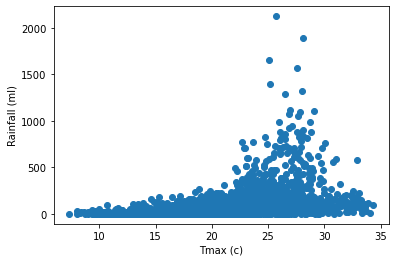

In [14]:
x = df.Tmax
y = df.Rainfall
plt.scatter(x,y)
plt.xlabel('Tmax (c)')
plt.ylabel('Rainfall (ml)')
plt.show()

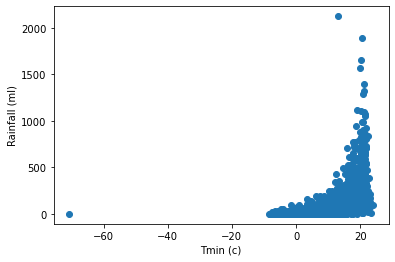

In [15]:
x = df.Tmin
y = df.Rainfall
plt.scatter(x,y)
plt.xlabel('Tmin (c)')
plt.ylabel('Rainfall (ml)')
plt.show()

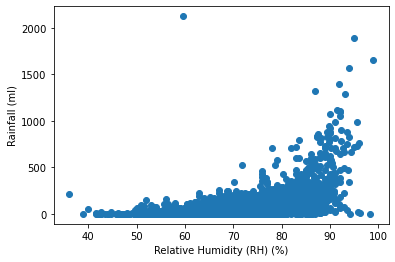

In [16]:
x = df.RH
y = df.Rainfall
plt.scatter(x,y)
plt.xlabel('Relative Humidity (RH) (%)')
plt.ylabel('Rainfall (ml)')
plt.show()

In [17]:
x = df['Wind Speed']
y = df.Rainfall
plt.scatter(x,y)
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Rainfall (ml)')
plt.show()

KeyError: 'Wind Speed'

### Removing Outliers

In [ ]:
import seaborn as sns

In [ ]:
#finding outliers
sns.boxplot(x=df.RH)
plt.show()

In [ ]:
#removing outliers
Q1 = df.RH.quantile(0.25)
Q3 = df.RH.quantile(0.75)

IQR = Q3 - Q1

upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

df2=df[(df.RH> lowerlimit)  & (df.RH < upperlimit)]
df2.shape

In [ ]:
#after removing outliers from RH
sns.boxplot(x=df2.RH)
plt.show()

In [ ]:
#finding outliers
sns.boxplot(x=df2['Wind Speed'])
plt.show()

In [ ]:
#removing outliers
Q1 = df2['Wind Speed'].quantile(0.25)
Q3 = df2['Wind Speed'].quantile(0.75)

IQR = Q3 - Q1

upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

df3=df2[(df2['Wind Speed']> lowerlimit)  & (df2['Wind Speed'] < upperlimit)]
df3.shape

In [ ]:
#after removing outliers from Wind Speed
sns.boxplot(x=df3['Wind Speed'])
plt.show()

### Heatmap

In [ ]:
df3.corr()

In [ ]:
sns.heatmap(df3.corr(), annot=True)

### Feature Engineering 

#### Feature Scaling 

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# sc = StandardScaler()
# scaled_data = sc.fit_transform(df3)
# df4 = pd.DataFrame(data=scaled_data,columns=df3.columns)
# df4.head()
df4=df3

### Model Training and Testing

#### Splitting Data 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df4[['location', 'Year', 'Month', 'Tmax', 'Tmin','RH', 'Wind Speed']]
y = df4['Rainfall']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
x_train.count()

In [ ]:
x_test.count()

### Random Forest Algorithm

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_random = RandomForestRegressor(n_estimators=10)
model_random.fit(x_train,y_train)

In [ ]:
r_pred = model_random.predict(x_train)
r_pred

### Model Evaluation (Random Forest Algorithm)

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np

In [ ]:
y_train_predicted = model_random.predict(x_train)
y_test_predicted = model_random.predict(x_test)

print("Train set accuracy: ",r2_score(y_train,y_train_predicted))

print("Test set accuracy : ",r2_score(y_test,y_test_predicted))

print("MSE:",mean_squared_error(y_test,y_test_predicted))

print('root_mean_squared error: ',np.sqrt(mean_squared_error(y_test,y_test_predicted)))  

In [ ]:
#actual vs predict
# result = pd.concat([x_test['Rainfall'], pd.Series(y_test_predicted, index=x_test.index)], axis=1)
# result.columns = ['Actual', 'Predict']
# result.head(10)

### Decision Tree Algorithm

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_decision = DecisionTreeRegressor(max_depth=5)
model_decision.fit(x_train, y_train)

In [ ]:
K_pred=model_decision.predict(x_test)

In [ ]:
y_train_predicted = model_decision.predict(x_train)
y_test_predicted = model_decision.predict(x_test)
print("Train set accuracy: ",r2_score(y_train,y_train_predicted))
print("Test set accuracy : ",r2_score(y_test,y_test_predicted))
print("MSE:",mean_squared_error(y_test,y_test_predicted))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_test_predicted))) 

### Model Evaluation (Decision Tree Algorithm)

In [ ]:
y_train_predicted = model_decision.predict(x_train)
y_test_predicted = model_decision.predict(x_test)
print("Train set accuracy: ",r2_score(y_train,y_train_predicted))
print("Test set accuracy : ",r2_score(y_test,y_test_predicted))
print("MSE:",mean_squared_error(y_test,y_test_predicted))
print('RMSE: ',np.sqrt(mean_squared_error(y_test, y_test_predicted))) 

In [ ]:
#actual vs predict
result = pd.DataFrame({'Actual':y_test,'Predicted':K_pred})
result.head(10)

### KNN Algorithm

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
model_KNNR = KNeighborsRegressor(10)
model_KNNR.fit(x_train,y_train)

In [ ]:
K_pred = model_KNNR.predict(x_test)

### Model Evaluation (KNN Algorithm)

In [ ]:
y_train_predicted = model_KNNR.predict(x_train)
y_test_predicted = model_KNNR.predict(x_test)

print("Train set accuracy: ",r2_score(y_train,y_train_predicted))

print("Test set accuracy : ",r2_score(y_test,y_test_predicted))

print("MSE:",mean_squared_error(y_test,y_test_predicted))

print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_test_predicted))) 

In [ ]:
#actual vs predict
result = pd.DataFrame({'Actual':y_test,'Predicted':K_pred})
result.head(10)

### Using  Pipeline

In [ ]:
x = df4.drop('Rainfall',axis=1)
y = df4['Rainfall']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.20, shuffle=True, random_state=50)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [ ]:
numeric_col = x.select_dtypes(include=['int64','float64']).columns
numeric_col

In [ ]:
categorical_col = x.select_dtypes(include=['object']).columns
categorical_col

In [ ]:
numeric_index = [x.columns.get_loc(col) for col in numeric_col]
numeric_index

In [ ]:
categorical_index = [x.columns.get_loc(col) for col in categorical_col]
categorical_index

In [ ]:
#Building the Numeric Transformation Pipeline
numeric_transformer = Pipeline(steps = [
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler())
] )

In [ ]:
#Building the Categorical Transformation Pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy = 'most_frequent',fill_value='missing')),
    ('le',OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers = [('num',numeric_transformer,numeric_index),
                ('label',categorical_transformer,categorical_index)]
)

In [ ]:
from sklearn import svm
model = svm.SVR(kernel='rbf',C=5000,gamma='scale')

In [ ]:
#Assemble the individual blocks to form the main pipeline
my_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

In [ ]:
from sklearn import set_config
set_config(display='diagram')
my_pipeline.fit(x_train, y_train)

In [ ]:
# from joblib import load, dump
# dump(my_pipeline,'model.joblib')

In [ ]:
my_pipeline.score(x_train,y_train)

In [ ]:
my_pipeline.score(x_test,y_test)

In [ ]:
y_pred = my_pipeline.predict(x_test)

In [ ]:
print("MSE:", mean_squared_error(y_test,y_pred))

print('RMSE: ', np.sqrt(mean_squared_error(y_test,y_pred)))                                                                                                                                          

In [ ]:
import pickle
pickle.dump(my_pipeline, open('model.pkl', 'wb'))
pickled_model = pickle.load(open('model.pkl', 'rb'))
pickled_model.predict(x_test)